In [ ]:
!pip install pandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [ ]:
df = pd.read_csv("/content/CAR DETAILS FROM CAR DEKHO.csv")
print(df)

                                     name  year  selling_price  km_driven  \
0                           Maruti 800 AC  2007          60000      70000   
1                Maruti Wagon R LXI Minor  2007         135000      50000   
2                    Hyundai Verna 1.6 SX  2012         600000     100000   
3                  Datsun RediGO T Option  2017         250000      46000   
4                   Honda Amaze VX i-DTEC  2014         450000     141000   
...                                   ...   ...            ...        ...   
4335  Hyundai i20 Magna 1.4 CRDi (Diesel)  2014         409999      80000   
4336           Hyundai i20 Magna 1.4 CRDi  2014         409999      80000   
4337                  Maruti 800 AC BSIII  2009         110000      83000   
4338     Hyundai Creta 1.6 CRDi SX Option  2016         865000      90000   
4339                     Renault KWID RXT  2016         225000      40000   

        fuel seller_type transmission         owner  
0     Petrol  Individ

In [ ]:
print(df.info())
print('-' * 40)
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB
None
----------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4

In [ ]:
df.describe()

,year,selling_price,km_driven
count,4340.000000,4.340000e+03,4340.000000
mean,2013.090783,5.041273e+05,66215.777419
std,4.215344,5.785487e+05,46644.102194
min,1992.000000,2.000000e+04,1.000000
25%,2011.000000,2.087498e+05,35000.000000
50%,2014.000000,3.500000e+05,60000.000000
75%,2016.000000,6.000000e+05,90000.000000
max,2020.000000,8.900000e+06,806599.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


In [ ]:
df.isnull().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64

<Axes: xlabel='selling_price', ylabel='Count'>

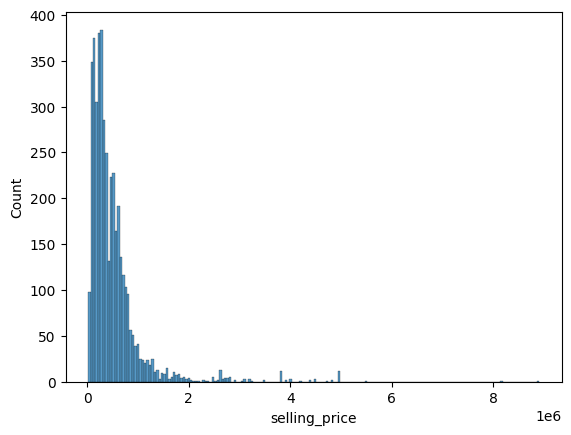

In [ ]:
sns.histplot(df["selling_price"])

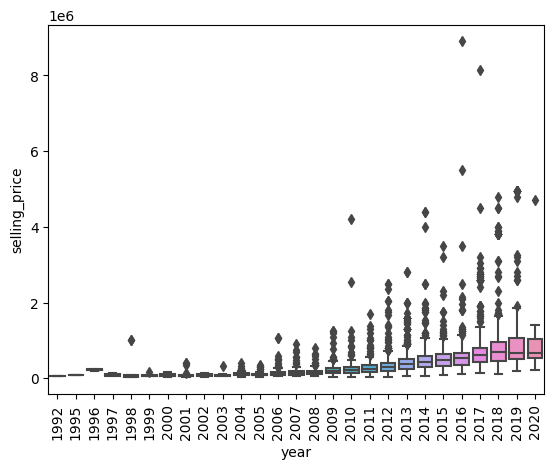

In [ ]:
sns.boxplot(x="year",y="selling_price",data=df)
plt.xticks(rotation=90)
plt.show()

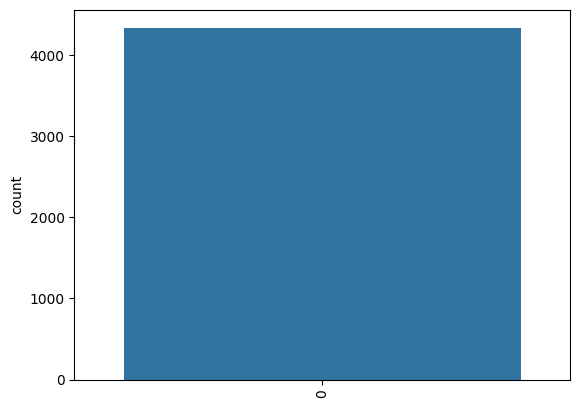

In [ ]:
sns.countplot(df["year"])
plt.xticks(rotation=90)
plt.show()

<Axes: xlabel='fuel', ylabel='selling_price'>

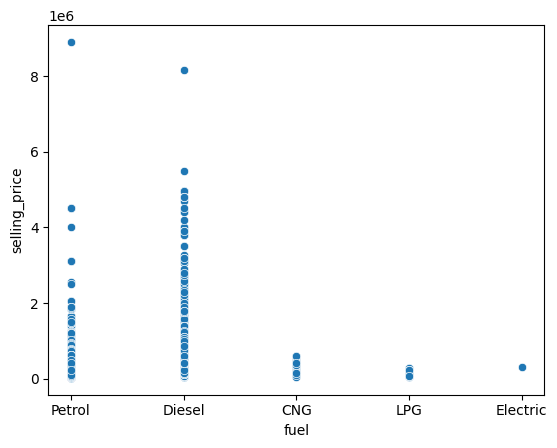

In [ ]:
sns.scatterplot(x="fuel",y="selling_price",data=df)

<ipython-input-19-8df7bcac526d>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

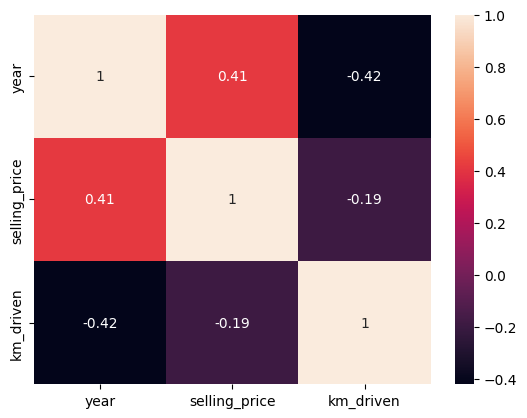

In [ ]:
sns.heatmap(df.corr(),annot=True)

In [ ]:
df[["km_driven"]]=scaler.fit_transform(df[["km_driven"]])

In [ ]:
df[["km_driven"]]

,km_driven
0,0.081139
1,-0.347689
2,0.724381
3,-0.433455
4,1.603479
...,...
4335,0.295553
4336,0.295553
4337,0.359877
4338,0.509967


In [ ]:
df["fuel"]=encoder.fit_transform(df["fuel"])

In [ ]:
df["fuel"]

0       4
1       4
2       1
3       4
4       1
       ..
4335    1
4336    1
4337    4
4338    1
4339    4
Name: fuel, Length: 4340, dtype: int64

In [ ]:
df["seller_type"]=encoder.fit_transform(df["seller_type"])
df["transmission"]=encoder.fit_transform(df["transmission"]) 
df["owner"]=encoder.fit_transform(df["owner"]) 

In [ ]:
x=df.drop(["selling_price"],axis=1)
y=df["selling_price"]
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=42)

In [ ]:
print(f"x train shape: {x_train.shape}")
print(f"x test shape: {x_test.shape}")
print(f"y train shape: {y_train.shape}")
print(f"y test shape: {y_test.shape}")

x train shape: (3255, 7)
x test shape: (1085, 7)
y train shape: (3255,)
y test shape: (1085,)
